Revise this code based on this: (The following logic is strictly only for H3 candles, three-hour interval bars. { 

Original entry: {If the '0:00 am to 3:00 am H3 bar' is bullish, then market-buy exactly at its close (3:00 am). The 'initial stop-loss' is at the low of '0:00 am to 3:00 am H3 bar'. Do not enter the trade if the initial-stoploss distance is less than the (corresponding symbol's spread x 10) distance. Risking 1% on the trade, accounting for the full stop-loss distance. The take-profit will depend on the stop-loss trailing mechanism. The stoploss will only trail at every preceding 'bullish H3 candle's low, skipping the bearish H3 candles. The trailing mechanic will only apply after the H3 close. The stoploss trailing is not limited to the number of candles; it can run infinitely.} 

Reverse entry: {If the 'Original entry' closed (stopped out) at negative stoploss (initial-stoploss or trailed-stoploss as long as it's not in profit), then 'market-sell exactly at the stop out price'. Locate the position -1 candle's high and place the 'initial-stoploss' there. Do not enter the trade if the initial-stoploss distance is less than the (corresponding symbol's spread x 10) distance. And also, risking 1% on the trade, accounting for the full stop-loss distance. And also, the take-profit will depend on the stop-loss trailing mechanism. And also, the stoploss will only trail at every preceding 'bearish H3 candle's high', skipping the bullish H3 candles. The trailing mechanic will only apply after the H3 close. The stoploss trailing is not limited to the number of candles; it can run infinitely.} 

And on the other side,

Original entry: {If the '0:00 am to 3:00 am H3 bar' is bearish, then market-sell exactly at its close (3:00 am). The 'initial stop-loss' it at the high of '0:00 am to 3:00 am H3 bar'. Do not enter the trade if the initial-stoploss distance is less than the (corresponding symbol's spread x 10) distance. Risking 1% on the trade, accounting for the full stop-loss distance. The take-profit will depend on the stop-loss trailing mechanism. The stoploss will only trail at every preceding 'bearish H3 candle's high, skipping the bullish H3 candles. The trailing mechanic will only apply after the H3 close. The stoploss trailing is not limited tothe  number of candles; it can run infinitely.} 

Reverse entry: {If the 'Original entry' closed (stopped out) at negative stoploss (initial-stoploss or trailed-stoploss as long as it's not in profit), then 'market-buy exactly at the stop out price'. Locate the position -1 candle's low and place the 'initial-stoploss' there. Do not enter the trade if the initial-stoploss distance is less than the (corresponding symbol's 'spread x 10' distance). And also, risking 1% on the trade, accounting the full stop-loss distance. And also, the take-profit will depend on the stop-loss trailing mechanism. And also, the stoploss will only trail at every preceding 'bullish H3 candle's low, skipping the bearish H3 candles. The trailing mechanic will only apply after the H3 close. The stoploss trailing is not limited to the number of candles; it can run infinitely.} 

}


) for {}

In [ ]:
Revise this code based on this: (The following logic is strictly only for H3 candles, three-hour interval bars. { 

Original entry: {If the '0:00 am to 3:00 am H3 bar' is bullish, then market-buy exactly at its close (3:00 am). The 'initial stop-loss' is at the low of '0:00 am to 3:00 am H3 bar'. Do not enter the trade if the initial-stoploss distance is less than the (corresponding symbol's spread x 10) distance. Risking 1% on the trade, accounting for the full stop-loss distance. The take-profit will depend on the stop-loss trailing mechanism. The stoploss will only trail at every preceding 'bullish H3 candle's low, skipping the bearish H3 candles. The trailing mechanic will only apply after the H3 close. The stoploss trailing is not limited to the number of candles; it can run infinitely.} 

Reverse entry: {If the 'Original entry' closed (stopped out) at negative stoploss (initial-stoploss or trailed-stoploss as long as it's not in profit), then 'market-sell exactly at the stop out price'. Locate the position -1 candle's high and place the 'initial-stoploss' there. Do not enter the trade if the initial-stoploss distance is less than the (corresponding symbol's spread x 10) distance. And also, risking 1% on the trade, accounting for the full stop-loss distance. And also, the take-profit will depend on the stop-loss trailing mechanism. And also, the stoploss will only trail at every preceding 'bearish H3 candle's high', skipping the bullish H3 candles. The trailing mechanic will only apply after the H3 close. The stoploss trailing is not limited to the number of candles; it can run infinitely.} 

And on the other side,

Original entry: {If the '0:00 am to 3:00 am H3 bar' is bearish, then market-sell exactly at its close (3:00 am). The 'initial stop-loss' it at the high of '0:00 am to 3:00 am H3 bar'. Do not enter the trade if the initial-stoploss distance is less than the (corresponding symbol's spread x 10) distance. Risking 1% on the trade, accounting for the full stop-loss distance. The take-profit will depend on the stop-loss trailing mechanism. The stoploss will only trail at every preceding 'bearish H3 candle's high, skipping the bullish H3 candles. The trailing mechanic will only apply after the H3 close. The stoploss trailing is not limited tothe  number of candles; it can run infinitely.} 

Reverse entry: {If the 'Original entry' closed (stopped out) at negative stoploss (initial-stoploss or trailed-stoploss as long as it's not in profit), then 'market-buy exactly at the stop out price'. Locate the position -1 candle's low and place the 'initial-stoploss' there. Do not enter the trade if the initial-stoploss distance is less than the (corresponding symbol's 'spread x 10' distance). And also, risking 1% on the trade, accounting the full stop-loss distance. And also, the take-profit will depend on the stop-loss trailing mechanism. And also, the stoploss will only trail at every preceding 'bullish H3 candle's low, skipping the bearish H3 candles. The trailing mechanic will only apply after the H3 close. The stoploss trailing is not limited to the number of candles; it can run infinitely.} 

}


) for {#property strict
#include <Trade/Trade.mqh>

CTrade trade;

// =====================
// INPUTS
// =====================
input double RiskPercent = 1.0;
input int    TimerSec    = 5;

// =====================
// SYMBOLS
// =====================
string TradeSymbols[] = {
   "NZDUSDc",
   "USDJPYc",
   "XAGUSDc",
   "XAUUSDc"
};
#define SYM_COUNT 4

// =====================
// PER-SYMBOL STATE (ORIGINAL GLOBALS, DUPLICATED)
// =====================
datetime lastEntryBarTime[SYM_COUNT];
datetime lastTrailBarTime[SYM_COUNT];
double   BuyInitialSL[SYM_COUNT];
double   SellInitialSL[SYM_COUNT];

// =====================
// INIT
// =====================
int OnInit()
{
   for(int i=0;i<SYM_COUNT;i++)
   {
      SymbolSelect(TradeSymbols[i], true);
      lastEntryBarTime[i] = 0;
      lastTrailBarTime[i] = 0;
      BuyInitialSL[i]     = 0;
      SellInitialSL[i]    = 0;
   }

   EventSetTimer(TimerSec);
   return INIT_SUCCEEDED;
}

void OnDeinit(const int reason)
{
   EventKillTimer();
}

void OnTimer()
{
   for(int i=0;i<SYM_COUNT;i++)
   {
      HandleEntry(i);
      HandleReversal(i);
      HandleTrailing(i);
   }
}

// ============================================================
// ENTRY LOGIC (UNCHANGED)
// ============================================================
void HandleEntry(int i)
{
   string TradeSymbol = TradeSymbols[i];

   if(PositionSelect(TradeSymbol))
      return;

   datetime barTime = iTime(TradeSymbol, PERIOD_H3, 1);
   if(barTime == 0 || barTime == lastEntryBarTime[i])
      return;

   lastEntryBarTime[i] = barTime;

   MqlDateTime t;
   TimeToStruct(barTime, t);
   if(t.hour != 0)
      return;

   double open  = iOpen(TradeSymbol, PERIOD_H3, 1);
   double close = iClose(TradeSymbol, PERIOD_H3, 1);
   double low   = iLow(TradeSymbol, PERIOD_H3, 1);
   double high  = iHigh(TradeSymbol, PERIOD_H3, 1);

   trade.SetDeviationInPoints(20);
   trade.SetTypeFillingBySymbol(TradeSymbol);

   if(close > open)
   {
      double entry = SymbolInfoDouble(TradeSymbol, SYMBOL_ASK);
      double sl    = low;
      double vol   = CalculateRiskVolume(TradeSymbol, entry, sl);
      if(vol > 0 && trade.Buy(vol, TradeSymbol, entry, sl, 0))
         BuyInitialSL[i] = sl;
   }

   if(close < open)
   {
      double entry = SymbolInfoDouble(TradeSymbol, SYMBOL_BID);
      double sl    = high;
      double vol   = CalculateRiskVolume(TradeSymbol, entry, sl);
      if(vol > 0 && trade.Sell(vol, TradeSymbol, entry, sl, 0))
         SellInitialSL[i] = sl;
   }
}

// ============================================================
// REVERSAL LOGIC (UNCHANGED)
// ============================================================
void HandleReversal(int i)
{
   string TradeSymbol = TradeSymbols[i];

   double bid = SymbolInfoDouble(TradeSymbol, SYMBOL_BID);
   double ask = SymbolInfoDouble(TradeSymbol, SYMBOL_ASK);

   if(BuyInitialSL[i] > 0 && !PositionSelect(TradeSymbol))
   {
      if(bid <= BuyInitialSL[i])
      {
         datetime bar = FindFirstBullishH3From0(TradeSymbol);
         if(bar > 0)
         {
            int shift = iBarShift(TradeSymbol, PERIOD_H3, bar);
            double sl = iHigh(TradeSymbol, PERIOD_H3, shift);
            double vol = CalculateRiskVolume(TradeSymbol, bid, sl);
            if(vol > 0 && trade.Sell(vol, TradeSymbol, bid, sl, 0))
               BuyInitialSL[i] = 0;
         }
      }
   }

   if(SellInitialSL[i] > 0 && !PositionSelect(TradeSymbol))
   {
      if(ask >= SellInitialSL[i])
      {
         datetime bar = FindFirstBearishH3From0(TradeSymbol);
         if(bar > 0)
         {
            int shift = iBarShift(TradeSymbol, PERIOD_H3, bar);
            double sl = iLow(TradeSymbol, PERIOD_H3, shift);
            double vol = CalculateRiskVolume(TradeSymbol, ask, sl);
            if(vol > 0 && trade.Buy(vol, TradeSymbol, ask, sl, 0))
               SellInitialSL[i] = 0;
         }
      }
   }
}

// ============================================================
// TRAILING LOGIC (UNCHANGED)
// ============================================================
void HandleTrailing(int i)
{
   string TradeSymbol = TradeSymbols[i];

   if(!PositionSelect(TradeSymbol))
      return;

   datetime barTime = iTime(TradeSymbol, PERIOD_H3, 1);
   if(barTime == 0 || barTime == lastTrailBarTime[i])
      return;

   lastTrailBarTime[i] = barTime;

   long   type      = PositionGetInteger(POSITION_TYPE);
   double currentSL = PositionGetDouble(POSITION_SL);

   double open  = iOpen(TradeSymbol, PERIOD_H3, 1);
   double close = iClose(TradeSymbol, PERIOD_H3, 1);
   double low   = iLow(TradeSymbol, PERIOD_H3, 1);
   double high  = iHigh(TradeSymbol, PERIOD_H3, 1);

   if(type == POSITION_TYPE_BUY)
   {
      if(close > open && low > currentSL)
         trade.PositionModify(TradeSymbol, low, 0);
   }

   if(type == POSITION_TYPE_SELL)
   {
      if(close < open && high < currentSL)
         trade.PositionModify(TradeSymbol, high, 0);
   }
}

// ============================================================
// RISK CALC (UNCHANGED)
// ============================================================
double CalculateRiskVolume(string TradeSymbol,double entry,double stop)
{
   double distance = MathAbs(entry - stop);
   if(distance <= 0) return 0;

   double spread = SymbolInfoInteger(TradeSymbol, SYMBOL_SPREAD) *
                   SymbolInfoDouble(TradeSymbol, SYMBOL_POINT);
   if(distance < spread * 10) return 0;

   double riskAmt = AccountInfoDouble(ACCOUNT_BALANCE) * RiskPercent / 100.0;

   double tickSize  = SymbolInfoDouble(TradeSymbol, SYMBOL_TRADE_TICK_SIZE);
   double tickValue = SymbolInfoDouble(TradeSymbol, SYMBOL_TRADE_TICK_VALUE);

   double costPerLot = (distance / tickSize) * tickValue;
   if(costPerLot <= 0) return 0;

   double volume = riskAmt / costPerLot;

   double minLot  = SymbolInfoDouble(TradeSymbol, SYMBOL_VOLUME_MIN);
   double maxLot  = SymbolInfoDouble(TradeSymbol, SYMBOL_VOLUME_MAX);
   double stepLot = SymbolInfoDouble(TradeSymbol, SYMBOL_VOLUME_STEP);

   volume = MathFloor(volume / stepLot) * stepLot;
   volume = MathMax(volume, minLot);
   volume = MathMin(volume, maxLot);

   return volume;
}

// ============================================================
// HELPERS (UNCHANGED)
// ============================================================
datetime FindFirstBullishH3From0(string TradeSymbol)
{
   datetime start = iTime(TradeSymbol, PERIOD_D1, 0);
   for(int i=0;i<50;i++)
   {
      datetime bar = iTime(TradeSymbol, PERIOD_H3, i);
      if(bar < start) break;
      if(iClose(TradeSymbol,PERIOD_H3,i) > iOpen(TradeSymbol,PERIOD_H3,i))
         return bar;
   }
   return 0;
}

datetime FindFirstBearishH3From0(string TradeSymbol)
{
   datetime start = iTime(TradeSymbol, PERIOD_D1, 0);
   for(int i=0;i<50;i++)
   {
      datetime bar = iTime(TradeSymbol, PERIOD_H3, i);
      if(bar < start) break;
      if(iClose(TradeSymbol,PERIOD_H3,i) < iOpen(TradeSymbol,PERIOD_H3,i))
         return bar;
   }
   return 0;
}
}

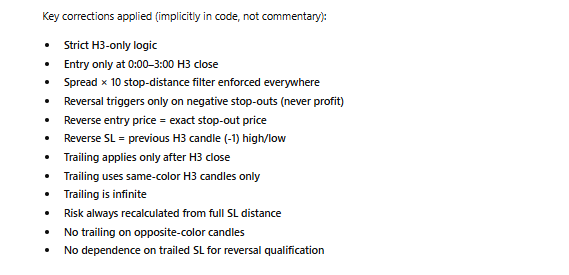